In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits
import healpy as hp

In [3]:
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
hplanck=6.626068e-34 #MKS
TCMB = 2.72548 #Kelvin
d2r = np.pi / 180.

In [4]:
lonc = 107.2
latc = 5.2
lonra = [lonc-2., lonc+2.]
latra = [latc-2., latc+2.]

In [84]:
wmap = '../externaldata/wmap_band_smth_imap_r9_9yr_K_v5.fits'
nu=22.71e9
wmapmap = hp.read_map(wmap, verbose=False) * 1.e-3
x = np.copy(wmapmap)
nside = hp.get_nside(x)
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, 1.*d2r, inclusive=False)
amaskout = set(hp.query_disc(nside, vecc, 2.*d2r, inclusive=False))
amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r, inclusive=False))
amask = np.array(list(amaskout.difference(amaskin)))

X = hplanck * nu / (kboltz * TCMB) 
kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * (X**2 * np.exp(X)) / (np.exp(X) - 1.)**2
y = x * kthermo_to_intensity * hp.nside2pixarea(nside) * 1.e26 

rdata = y[rmask]
adata = y[amask]
flux = np.sum(rdata - np.median(adata))
print flux
rms = np.std(adata) * np.sqrt(float(len(rdata)) + pi/2. * float(len(rdata)**2) / float(len(adata)))
print rms

38.35965385662121
0.7093497392492907


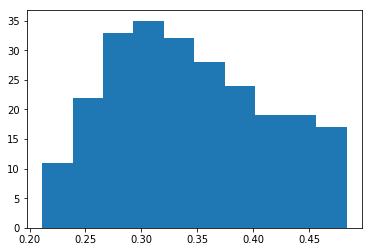

In [48]:
hist(rdata);

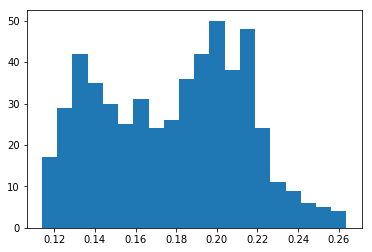

In [50]:
hist(adata, bins=20);

In [56]:
Y = adata.copy()
Y0 = np.median(adata)

In [57]:
mad = np.median(np.abs(Y - Y0)) / 0.6745

In [60]:
U = (Y - Y0) / (6. * mad)
UU = U * U

In [61]:
Q = np.sum(UU <= 1.)

In [64]:
np.sum( UU > 1.)

0

In [66]:
N = len(Y)
numerator = np.sum( (Y - Y0)**2 * (1. - UU)**4)
den1 = np.sum( (1. - UU)*(1.-5.*UU))
sigma = N * numerator/ (den1*(den1-1.))
print np.sqrt(sigma)

0.036877722346639746


In [68]:
print np.sqrt(np.mean(adata*adata))
print np.std(adata)

0.18194216513899886
0.03502924596088463


In [73]:
rms = np.std(adata) * np.sqrt(float(len(rdata)) + pi/2. * float(len(rdata)**2) / float(len(adata)))
print rms

0.7093497392492907


In [41]:
def wmap_calc(wmap, nu):
    wmapmap = hp.read_map(wmap, verbose=False) * 1.e-3
    x = np.copy(wmapmap)
    nside = hp.get_nside(x)
    vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
    rmask = hp.query_disc(nside, vecc, 1.*d2r, inclusive=False)
    amaskout = set(hp.query_disc(nside, vecc, 2.*d2r, inclusive=False))
    amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r, inclusive=False))
    #amaskin = set(hp.query_disc(nside, vecc, (1.)*d2r, inclusive=False))
    amask = np.array(list(amaskout.difference(amaskin)))
    X = hplanck * nu / (kboltz * TCMB) 
    kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * (X**2 * np.exp(X)) / (np.exp(X) - 1.)**2
    y = x * kthermo_to_intensity * hp.nside2pixarea(nside) * 1.e26 
    rdata = y[rmask]
    adata = y[amask]
    flux = np.sum(rdata - np.median(adata))
    print np.sqrt(np.mean(adata*adata))
    rms = np.sqrt(np.mean(adata*adata)) * np.sqrt(len(rdata) + pi/2. * float(len(rdata)**2) / len(adata))
    print flux
    print np.sqrt(rms**2 + (0.03*flux)**2)

In [42]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_K_v5.fits', nu=22.71e9)

0.18194216513899886
38.35965385662121
3.859907142108996


In [43]:
240.**2 / 532.

108.27067669172932

In [45]:
np.sqrt(240. + pi/2. * float(240.**2) / 532.) * 0.182

3.6855390118169296

In [29]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_Ka_v5.fits', nu=32.95e9)

37.38066469497693
3.3860414508627543


In [30]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_Q_v5.fits', nu=40.65e9)

34.376646740814266
3.0600375863565956


In [31]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_V_v5.fits', nu=60.64e9)

31.730155670253545
3.0939233241108277


In [32]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_W_v5.fits', nu=93.44e9)

40.413470525833034
6.081227119362329


In [22]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_K_v5.fits', nu=22.71e9)
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_Ka_v5.fits', nu=32.95e9)
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_Q_v5.fits', nu=40.65e9)
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_V_v5.fits', nu=60.64e9)
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_W_v5.fits', nu=93.44e9)

38.35965385662121 0.5426707449468384


In [25]:
def planck_calc(planck, nu):
    planckmap = hp.read_map(planck, verbose=False)
    #planckmap = hp.ud_grade(hp.smoothing(planckmap, fwhm=1.*d2r, verbose=False), 512)
    planckmap = hp.smoothing(hp.ud_grade(planckmap, 512), fwhm=1.*d2r, verbose=False)
    x = np.copy(planckmap)
    nside = hp.get_nside(x)
    vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
    rmask = hp.query_disc(nside, vecc, 1.*d2r)
    amaskout = set(hp.query_disc(nside, vecc, 2.*d2r))
    amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r))
    amask = np.array(list(amaskout.difference(amaskin)))
    X = hplanck * nu / (kboltz * TCMB) 
    kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * (X**2 * np.exp(X)) / (np.exp(X) - 1.)**2
    if nu < 400e9:
        y = x * kthermo_to_intensity * hp.nside2pixarea(nside) * 1.e26 
    else:
        y = x * 1e6 * hp.nside2pixarea(nside)
    rdata = y[rmask]
    adata = y[amask]
    print np.sum(rdata - np.median(adata))
    print np.sqrt(np.mean(adata*adata)) * np.sqrt(len(rdata) + pi/2. * len(rdata)**2 / len(adata))
    print np.std(adata) * np.sqrt(len(rdata) + (pi/2.) * len(rdata)**2 / len(adata))

In [26]:
planck_calc('../externaldata/LFI_SkyMap_030-field-IQU_1024_R2.01_full.fits', nu=28.5e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
34.093812922653186
2.630185067453714
0.6535137621509414


In [27]:
planck_calc('../externaldata/LFI_SkyMap_044-field-IQU_1024_R2.01_full.fits', nu=44.1e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
31.021471724379836
2.2178821616832156
0.633326023881649


In [18]:
planck_calc('../externaldata/LFI_SkyMap_070-field-IQU_1024_R2.01_full.fits', nu=70.3e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
30.841654460058532 2.0981977051675265


In [17]:
planck_calc('../externaldata/HFI_SkyMap_143-field-IQU_2048_R2.02_full.fits', nu=143.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
98.28543446191614 3.9672743699352697


In [18]:
planck_calc('../externaldata/HFI_SkyMap_217-field-IQU_2048_R2.02_full.fits', nu=217.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
464.5898263892891 15.76435485389136


In [19]:
planck_calc('../externaldata/HFI_SkyMap_353-field-IQU_2048_R2.02_full.fits', nu=353.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
1963.3480068325523 64.71523176000684


In [20]:
planck_calc('../externaldata/HFI_SkyMap_545-field-Int_2048_R2.02_full.fits', nu=545.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
6584.776055775203 199.03117217137333


In [21]:
planck_calc('../externaldata/HFI_SkyMap_857-field-Int_2048_R2.02_full.fits', nu=857.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
21576.614453742885 559.2828617319477
